# '''Salary_hike -> Build a prediction model for Salary_hike
'''
#Build a simple linear regression model by performing EDA and
do necessary transformations and select the best model using R or Python.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=300
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# EDA

In [3]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# to check unique values

In [5]:
df['YearsExperience'].unique()

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.7,  3.9,  4. ,
        4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,  7.9,  8.2,
        8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [6]:
df['Salary'].unique()

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

#    to check Duplicate records

In [7]:
df.duplicated().sum()

0

# to check missing values

In [8]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

<Axes: >

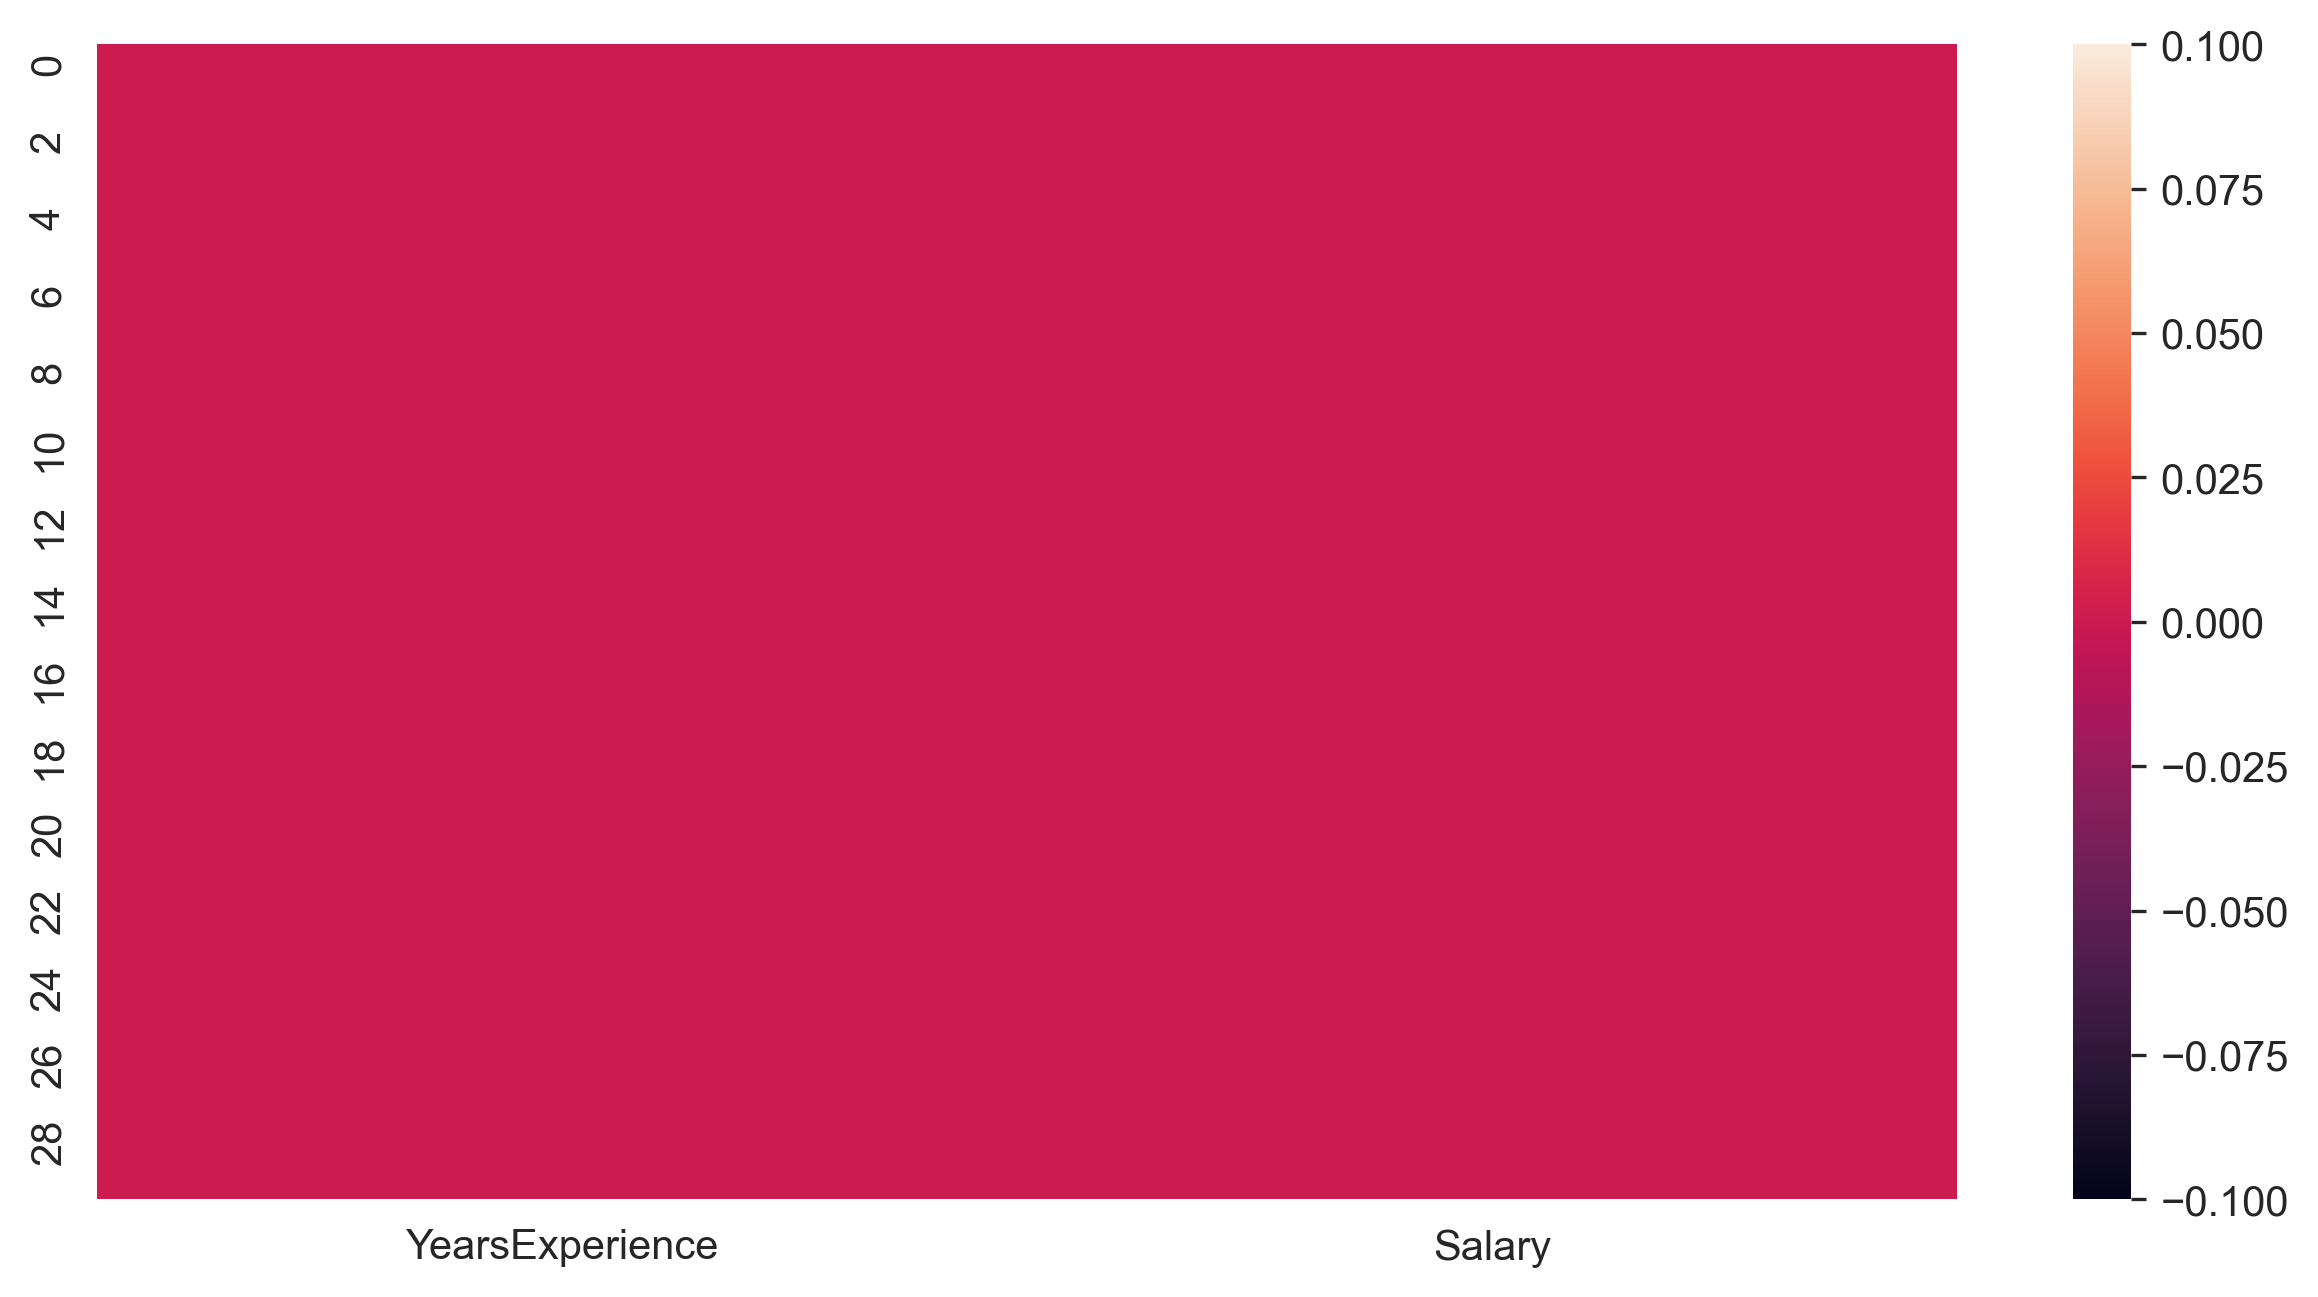

In [9]:
sns.heatmap(df.isna())

# Otlier Dection

<Axes: >

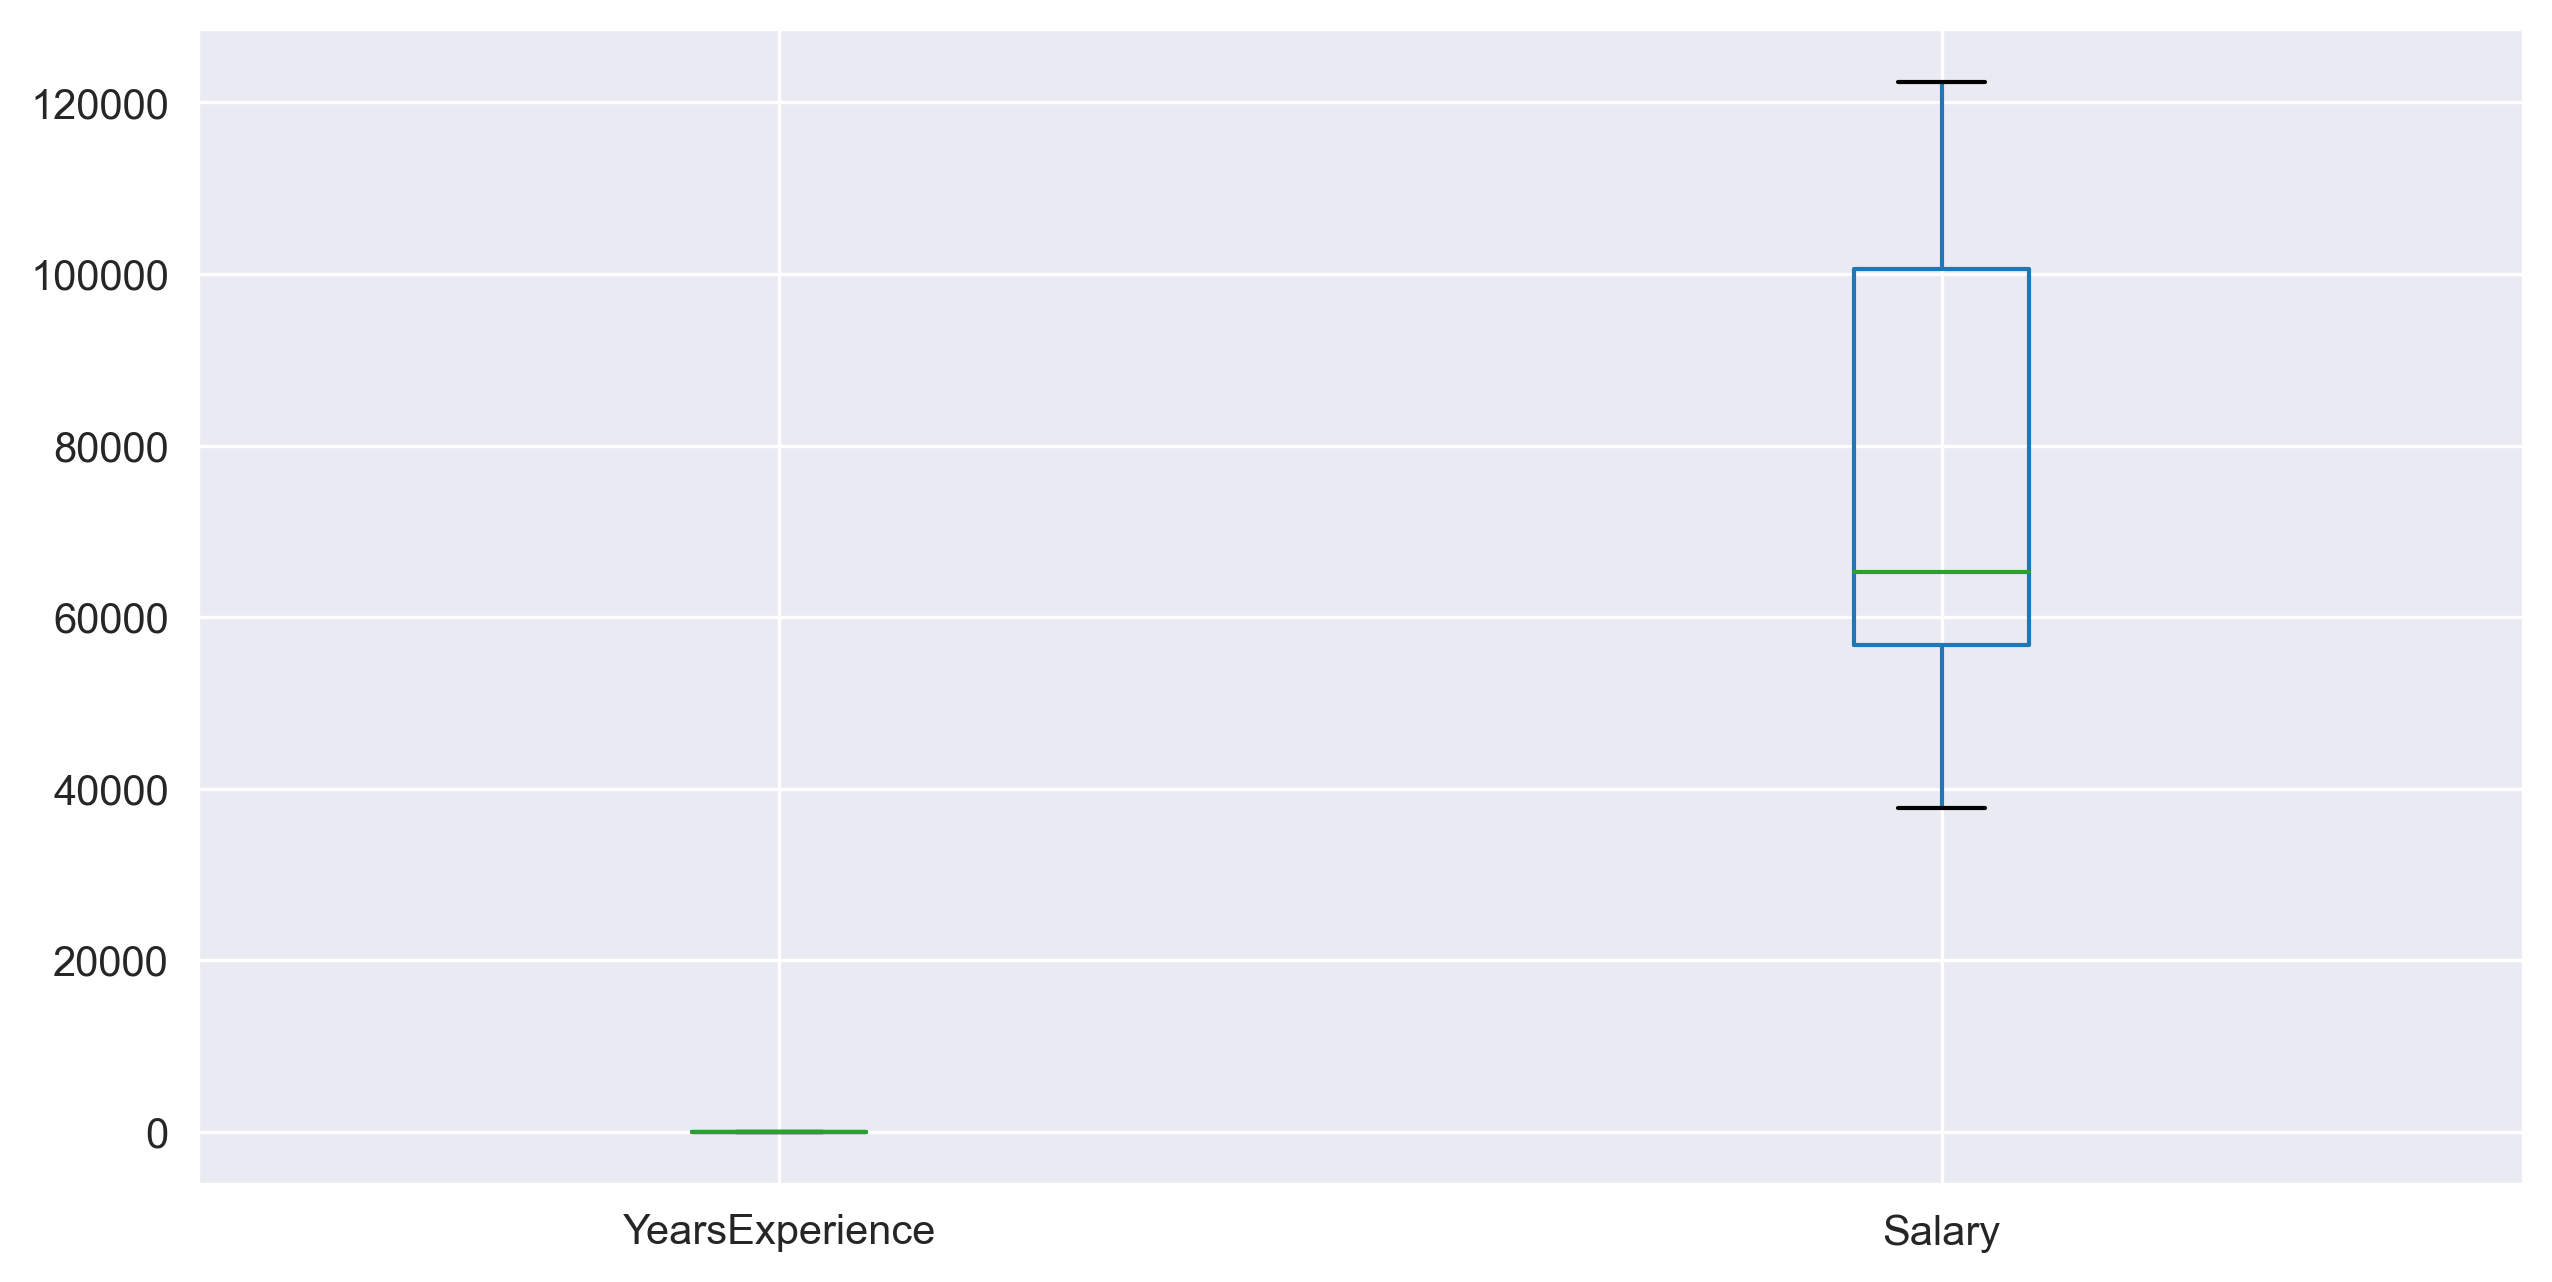

In [10]:
df.boxplot()

# Scatter Plot and correlation

In [11]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: >

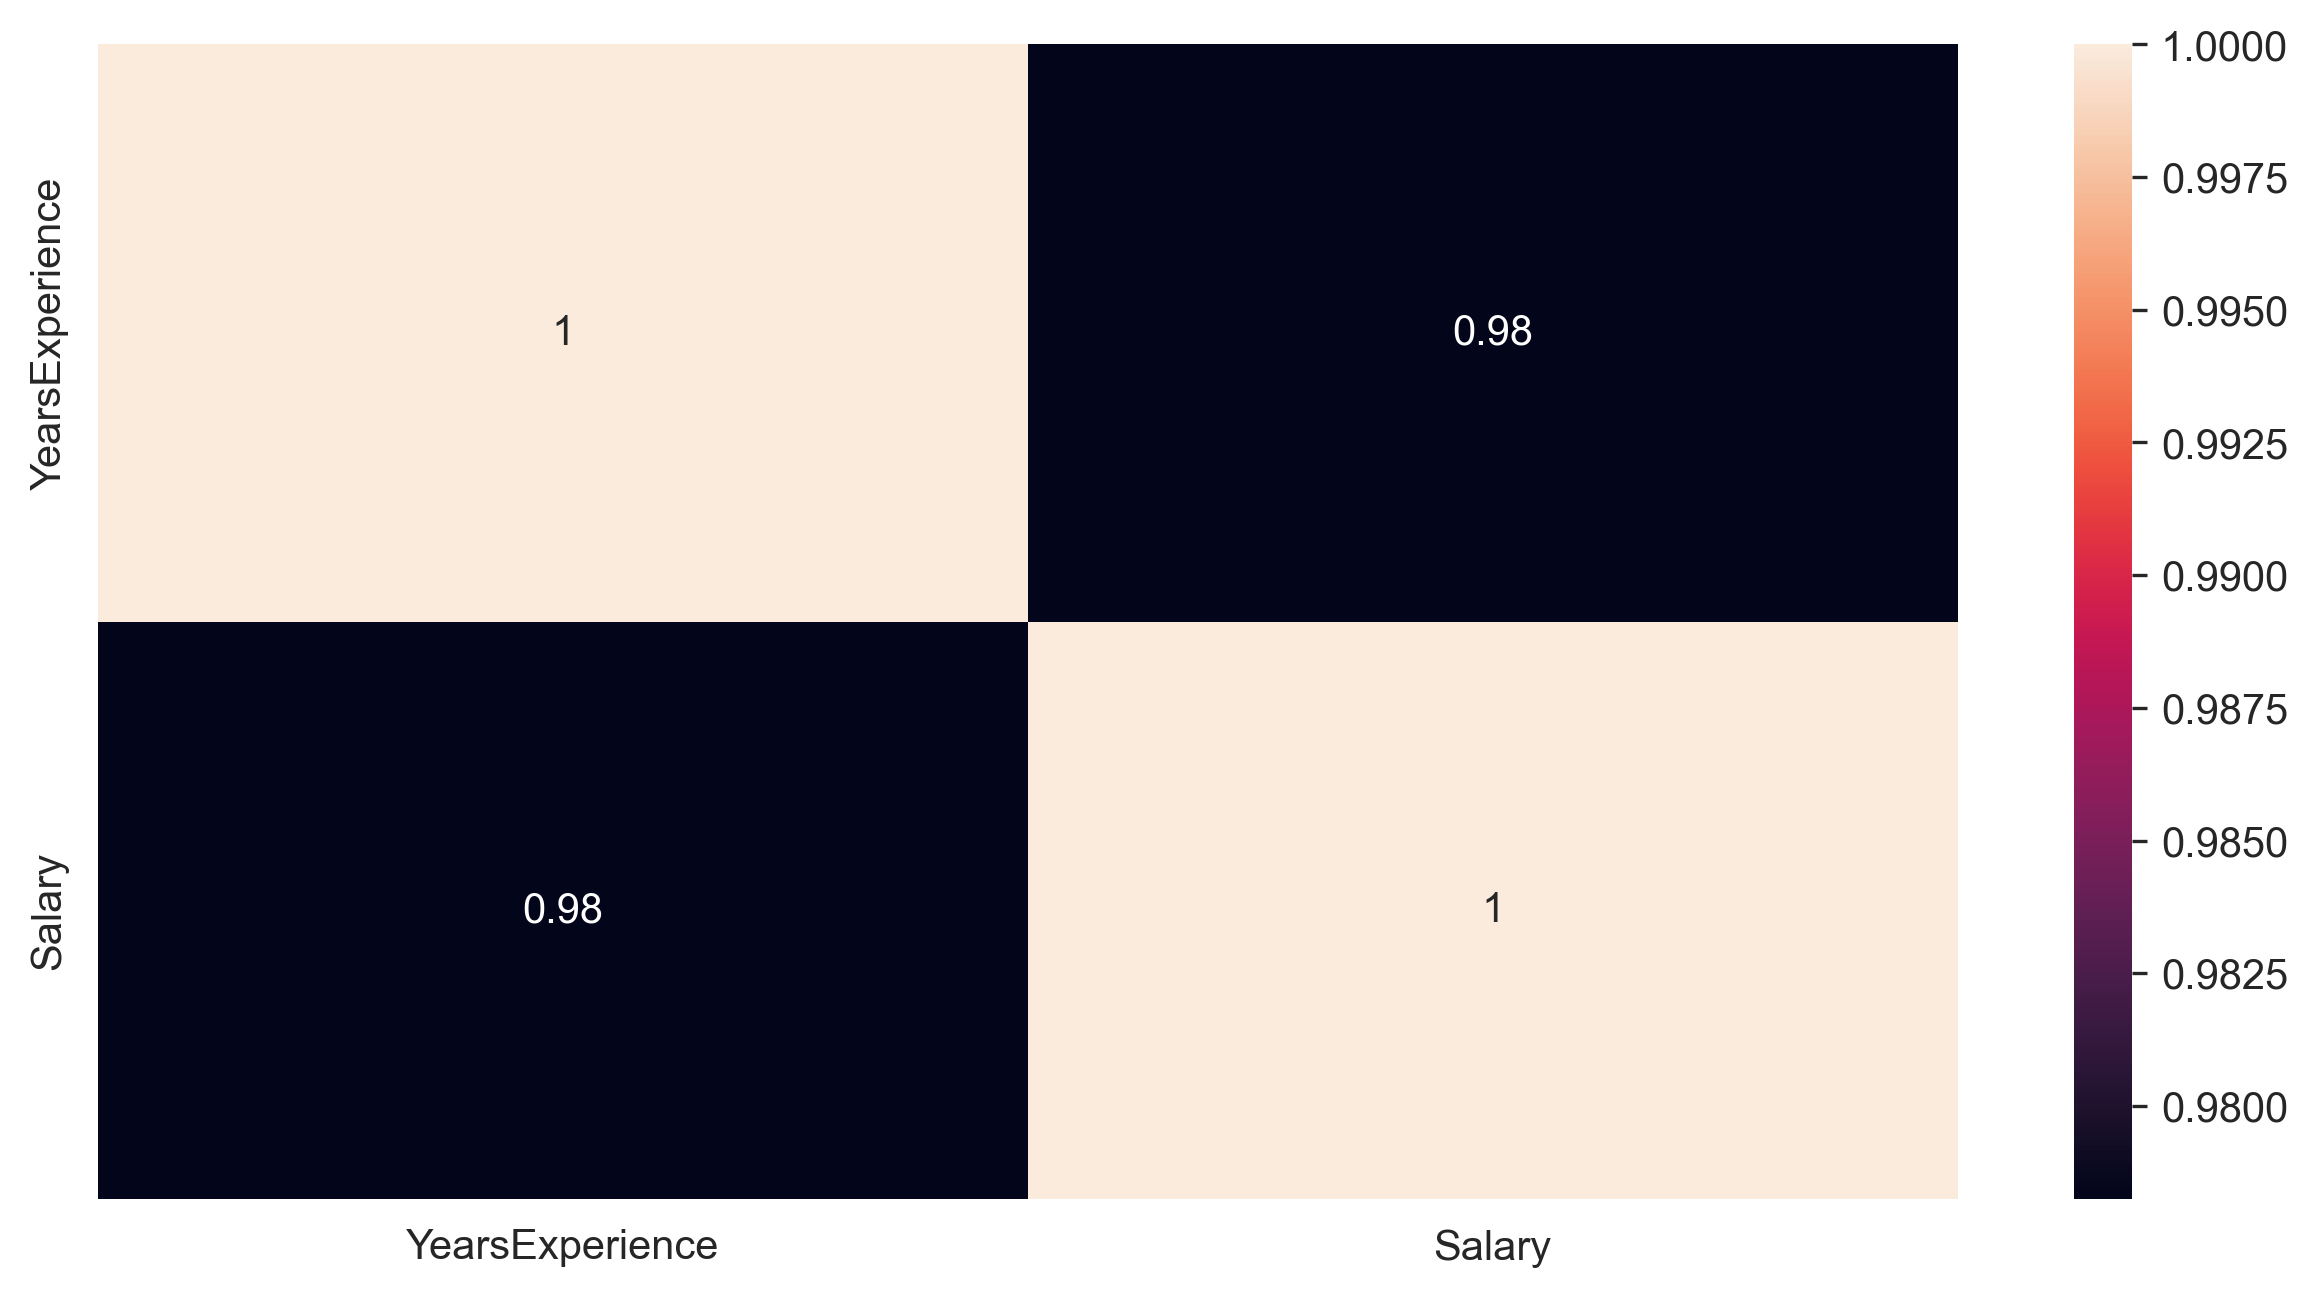

In [12]:
sns.heatmap(df.corr(),annot=True)

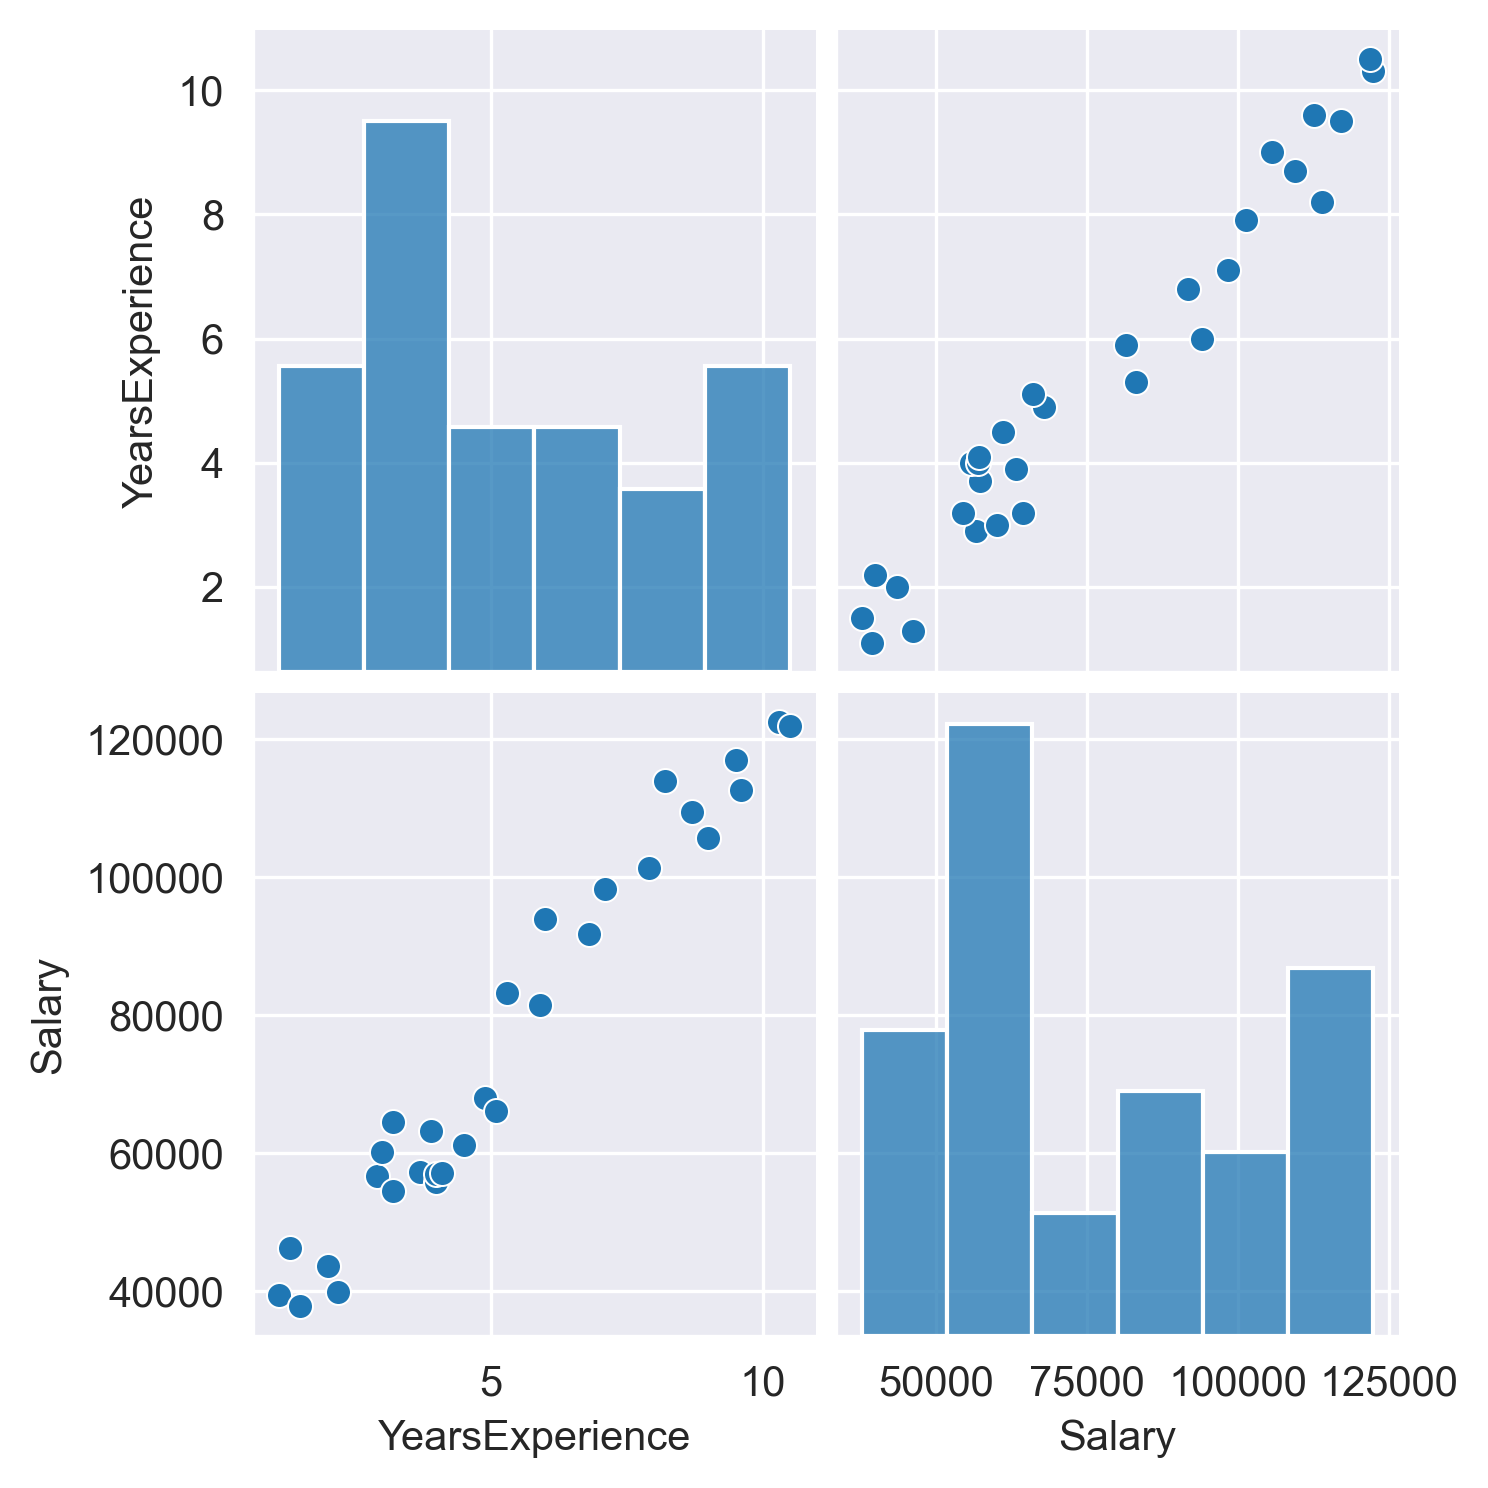

In [13]:
sns.pairplot(df)

In [14]:
import statsmodels.formula.api as smf

In [15]:
model=smf.ols('Salary~YearsExperience',data=df).fit()
model

In [16]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [17]:
# p value and t value
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

# example


In [18]:
YearsExperience=6.2
Salary=YearsExperience*9449.962321+25792.200199
Salary

84381.9665892

In [19]:
#   Evaluation Matrix
#    R2 value

In [20]:
model.rsquared

0.9569566641435086

#  Prediction for new data

In [21]:
newdf=pd.DataFrame({
    'YearsExperience':[7.3,8.9,12.6,13]
})
newdf

,YearsExperience
0,7.3
1,8.9
2,12.6
3,13.0


In [22]:
model.predict(newdf)

0     94776.925145
1    109896.864860
2    144861.725449
3    148641.710378
dtype: float64